In [152]:
import pandas
import os
import numpy as np
os.chdir("C:\\Spring_2017\\big_data\\project")
all_data = pandas.read_csv("NYPD_Complaint_Data_Historic.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [301]:
location = pandas.read_csv("nysub.csv")

In [172]:
sub_lat=[]
sub_lon=[]
sub_name=[]
for i in range(len(location)):
    sub_name.append(location['NAME'][i])
    sub_lat.append(float(location["the_geom"][i][7:-1].split()[1]))
    sub_lon.append(float(location["the_geom"][i][7:-1].split()[0]))
((sub_lat[166]-sub_lat[167])**2 +(sub_lon[166]-sub_lon[167])**2)**0.5

0.018615024964565376

In [136]:
crime_subway = {}
for i in range(len(sub_loc)):
    all_data['Distance'] = ((all_data['Latitude']-sub_lat[i])**2+(all_data['Longitude']-sub_lon[i])**2)**(0.5)
    all_data = all_data[all_data['Distance'].isnull() == False]
    all_data['flag_s'] = all_data['Distance']<0.003
    grouped_count_s = all_data.groupby(['LAW_CAT_CD'])['flag_s'].sum()
    all_data['flag_b'] = all_data['Distance']<0.003*2**(0.5)
    grouped_count_b = all_data.groupby(['LAW_CAT_CD'])['flag_b'].sum()
    crime_subway[sub_name[i]]=[v for v in grouped_count_s]+[v for v in grouped_count_b-grouped_count_s]

In [303]:
pickle.dump(crime_subway, open( "crime_subway.p", "wb" ) )

In [304]:
import pandas as pd
import pickle

df_sub = pd.DataFrame(crime_subway).transpose()
df_sub.columns = ["F_near","M_near", "V_near","F_far","M_far", "V_far"]
#grouped_count_s
df_sub["F_ratio"] = round(df_sub["F_near"]/df_sub["F_far"],3)
df_sub["M_ratio"] = round(df_sub["M_near"]/df_sub["M_far"],3)
df_sub["V_ratio"] = round(df_sub["V_near"]/df_sub["V_far"],3)
df_sub["Mean_R"] = (df_sub["F_ratio"]+df_sub["M_ratio"]+df_sub["V_ratio"])/3
df_sub['All'] = df_sub['F_near'] + df_sub['M_near'] + df_sub['V_near']

In [335]:
pickle.dump(sub_loc, open( "sub_loc.p", "wb" ) )
pickle.dump(df_sub, open( "df_sub.p", "wb" ) )

In [314]:
print(df_sub.mean())

F_near     1539.864789
M_near     2891.183099
V_near      515.605634
F_far      1271.678873
M_far      2307.515493
V_far       450.825352
F_ratio       1.316104
M_ratio       1.401059
V_ratio       1.244135
Mean_R        1.320433
All        4946.653521
dtype: float64


In [316]:
print("F_ratio: ",sum(df_sub['F_ratio']>1)/len(df_sub))
print("V_ratio: ",sum(df_sub['V_ratio']>1)/len(df_sub))
print("M_ratio: ",sum(df_sub['M_ratio']>1)/len(df_sub))
print("Overall_ratio: ",sum(df_sub['Mean_R']>1)/len(df_sub))

F_ratio:  0.766197183099
V_ratio:  0.647887323944
M_ratio:  0.738028169014
Overall_ratio:  0.746478873239


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


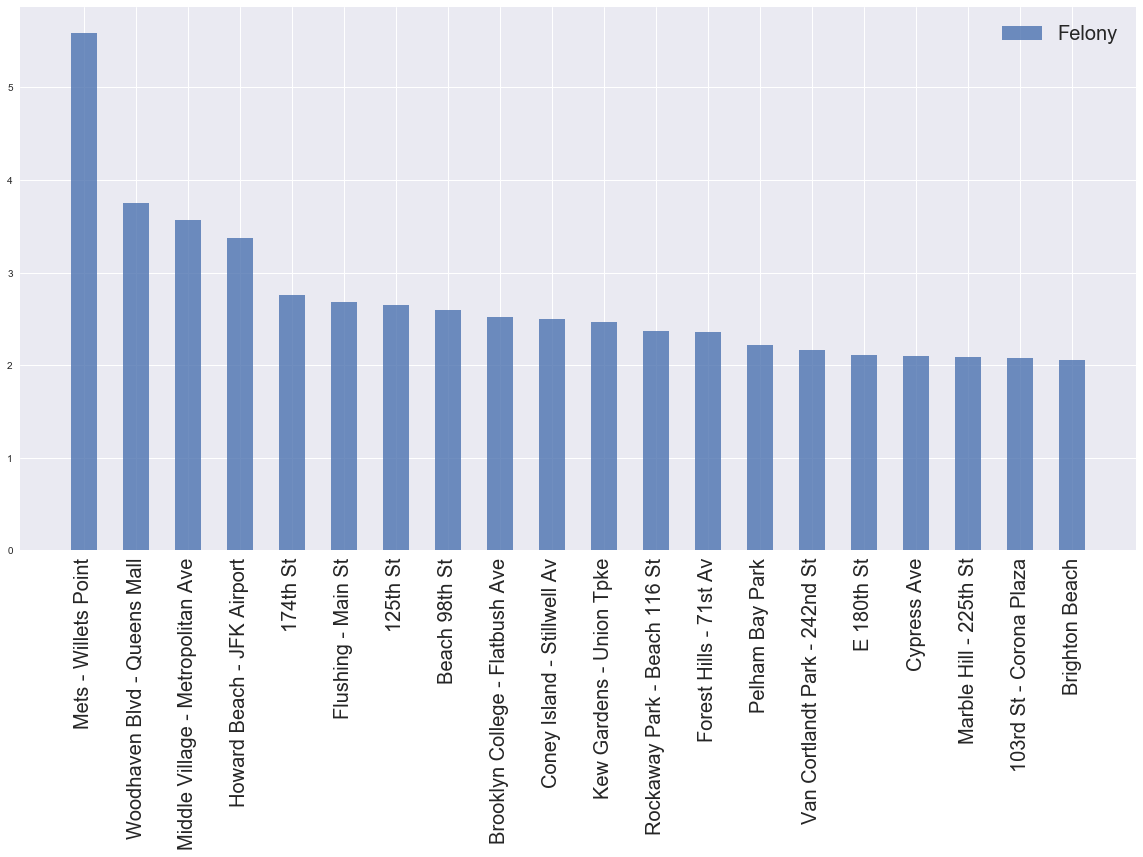

In [259]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

df_sub = df_sub.sort(['F_ratio'],ascending=0)
df_plot = df_sub.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['F_ratio'].astype(np.float), bar_width,align='center', alpha=0.8,label="Felony")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


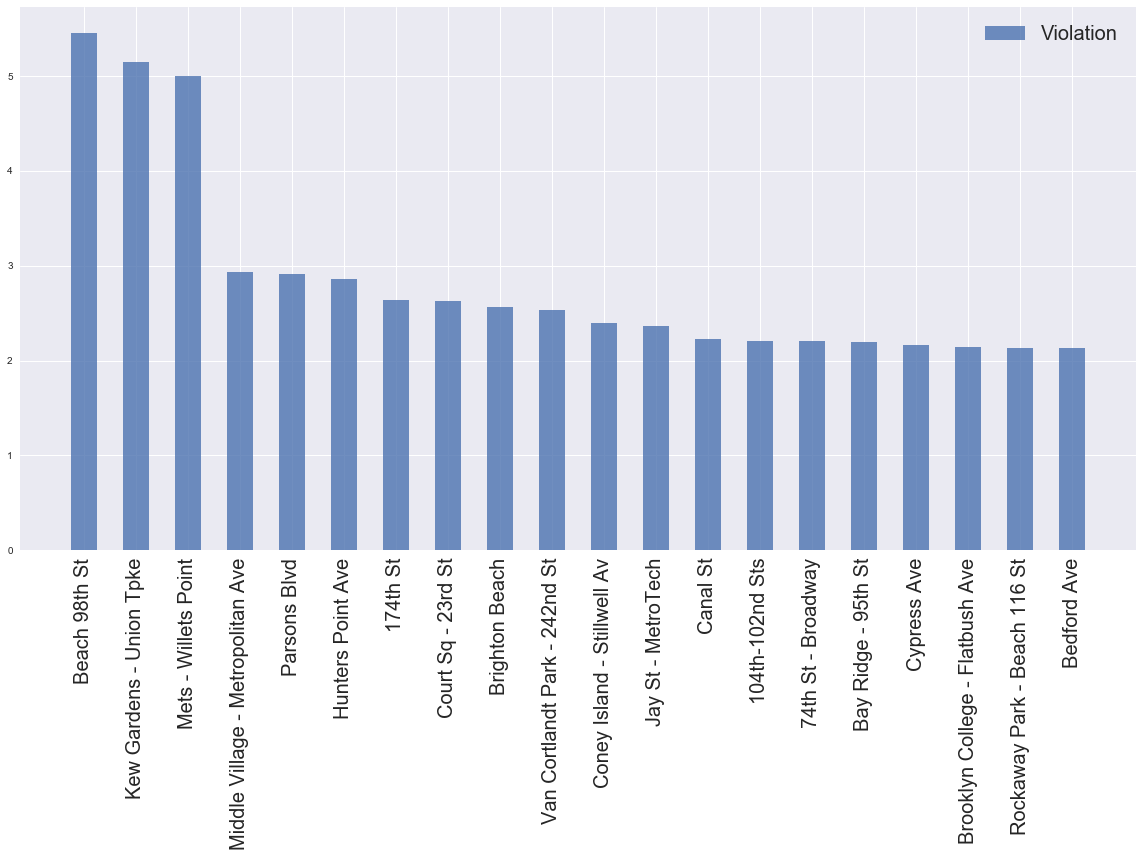

In [260]:
df_sub = df_sub.sort(['V_ratio'],ascending=0)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['V_ratio'].astype(np.float), bar_width,align='center', alpha=0.8, label = 'Violation')
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


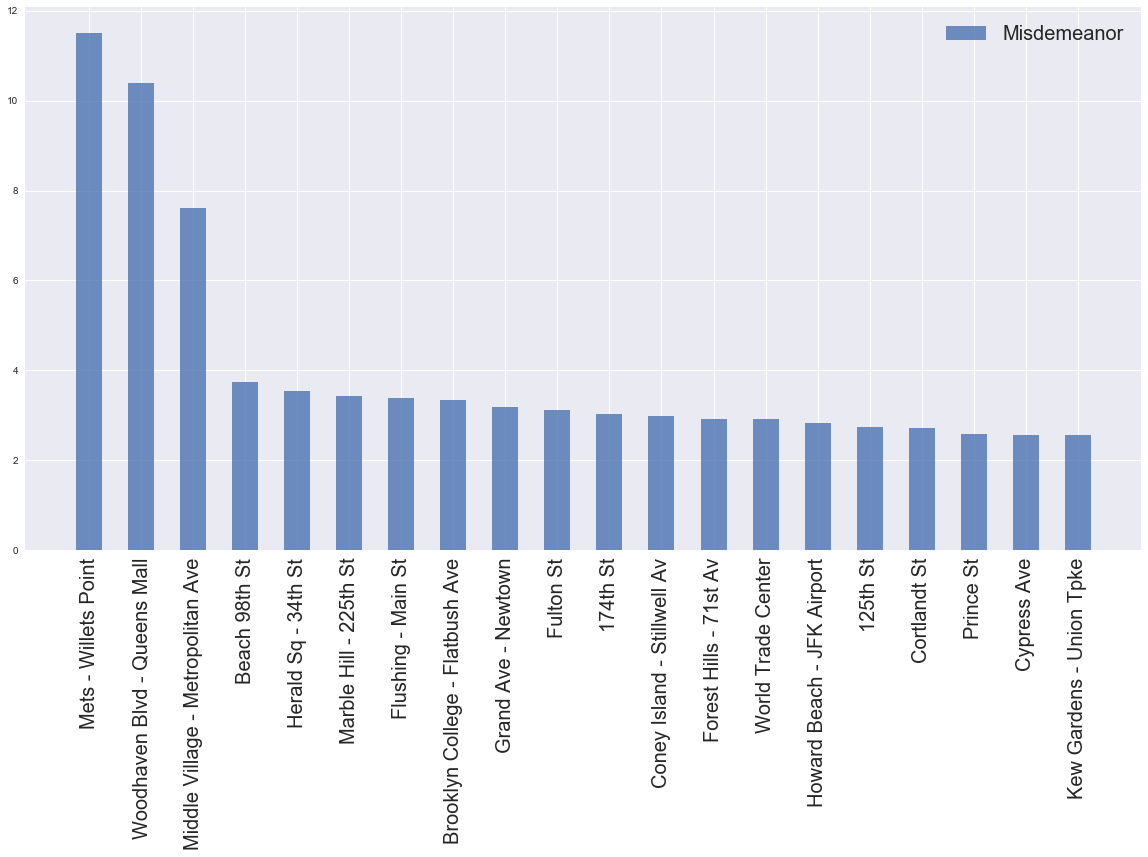

In [261]:
df_sub = df_sub.sort(['M_ratio'],ascending=0)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['M_ratio'].astype(np.float), bar_width,align='center', alpha=0.8, label='Misdemeanor')
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


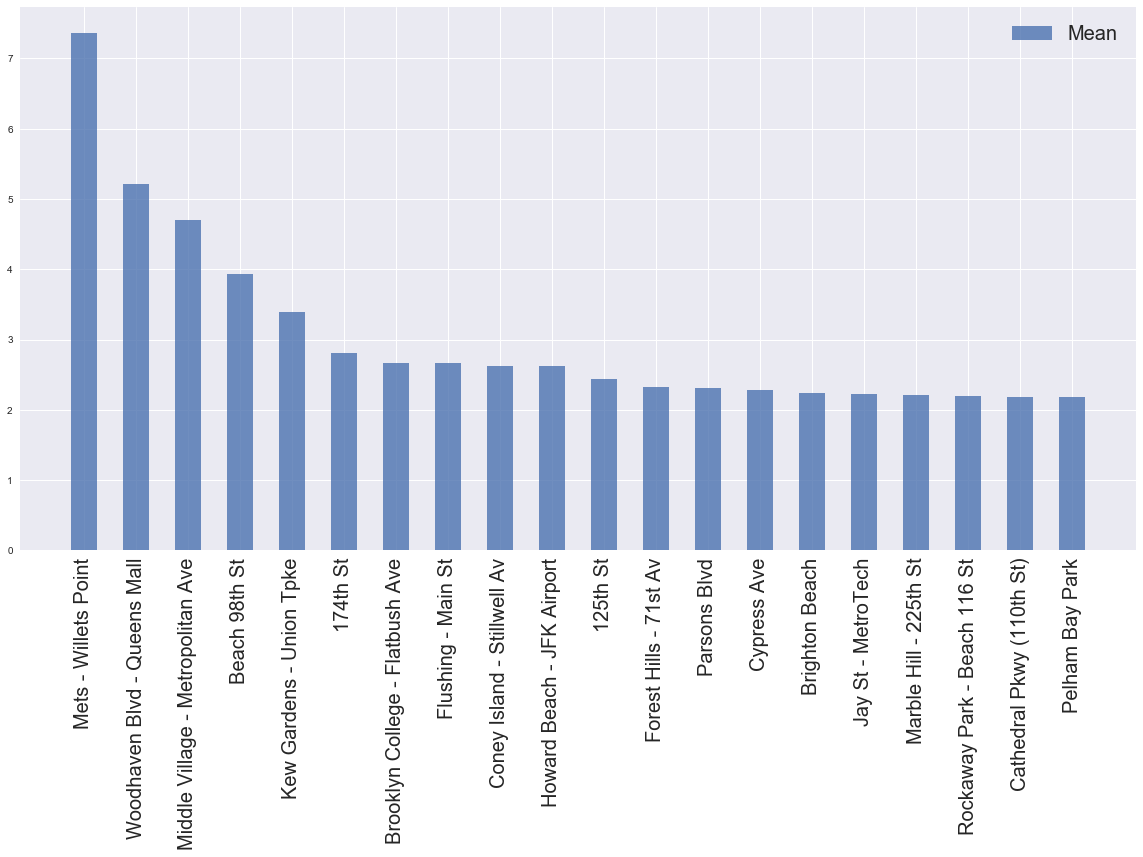

In [329]:
df_sub = df_sub.sort(['Mean_R'],ascending=0)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['Mean_R'].astype(np.float), bar_width,align='center', alpha=0.8, label='Mean')
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


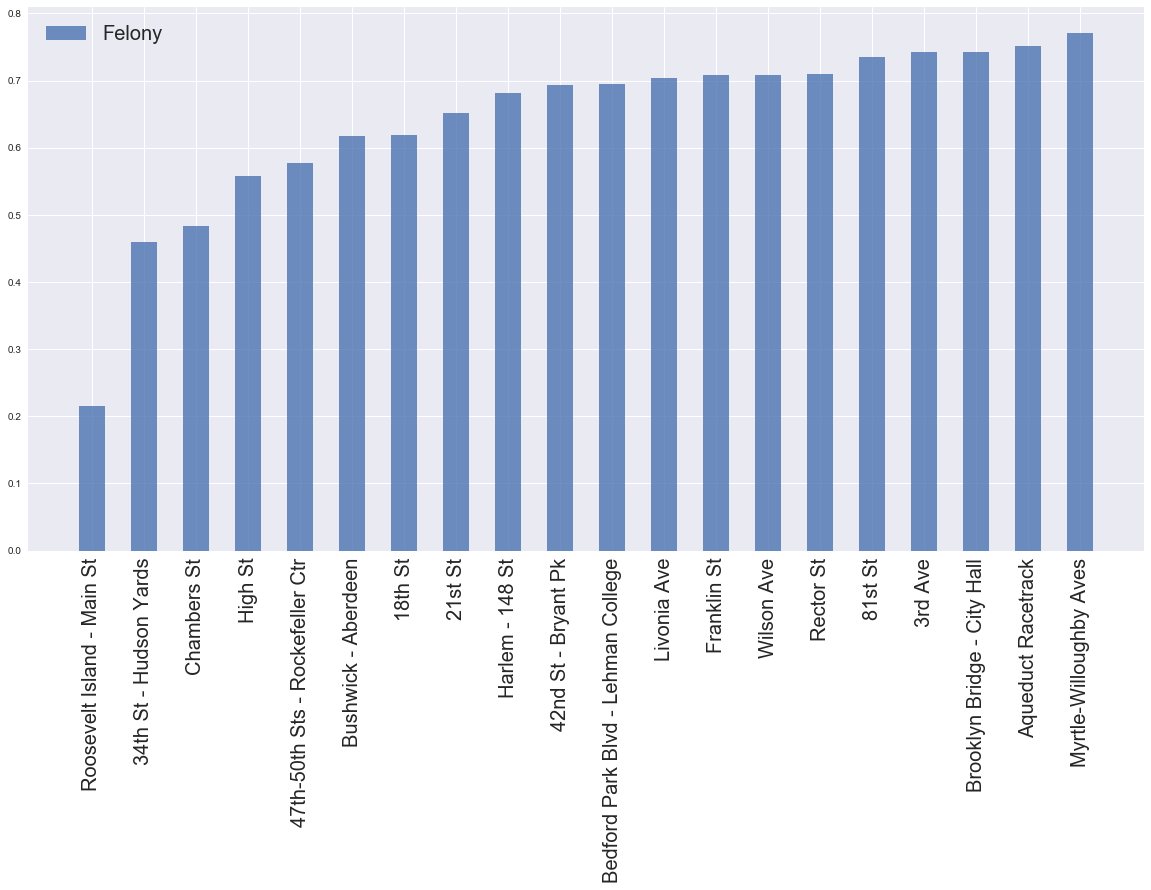

In [264]:
df_sub = df_sub.sort(['F_ratio'],ascending=1)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['F_ratio'].astype(np.float), bar_width,align='center', alpha=0.8,label='Felony')
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


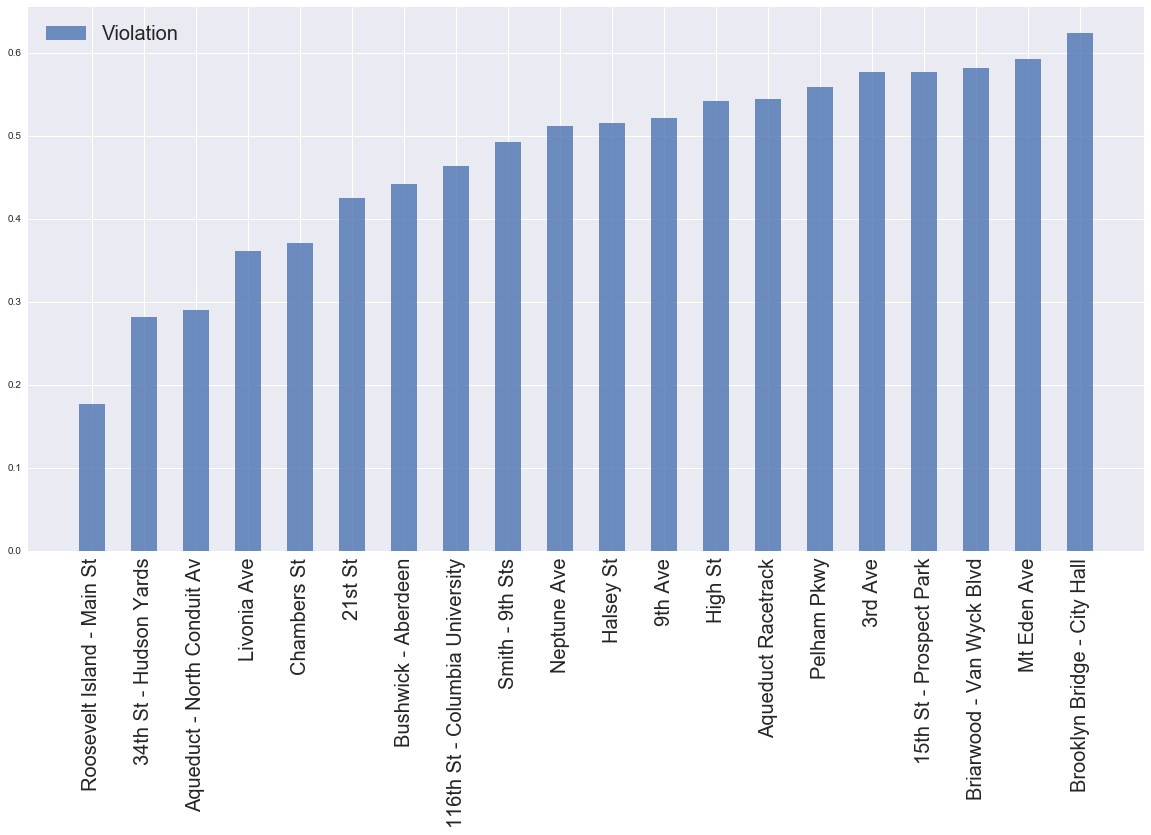

In [323]:
df_sub = df_sub.sort(['V_ratio'],ascending=1)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['V_ratio'].astype(np.float), bar_width,align='center', alpha=0.8, label='Violation')
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


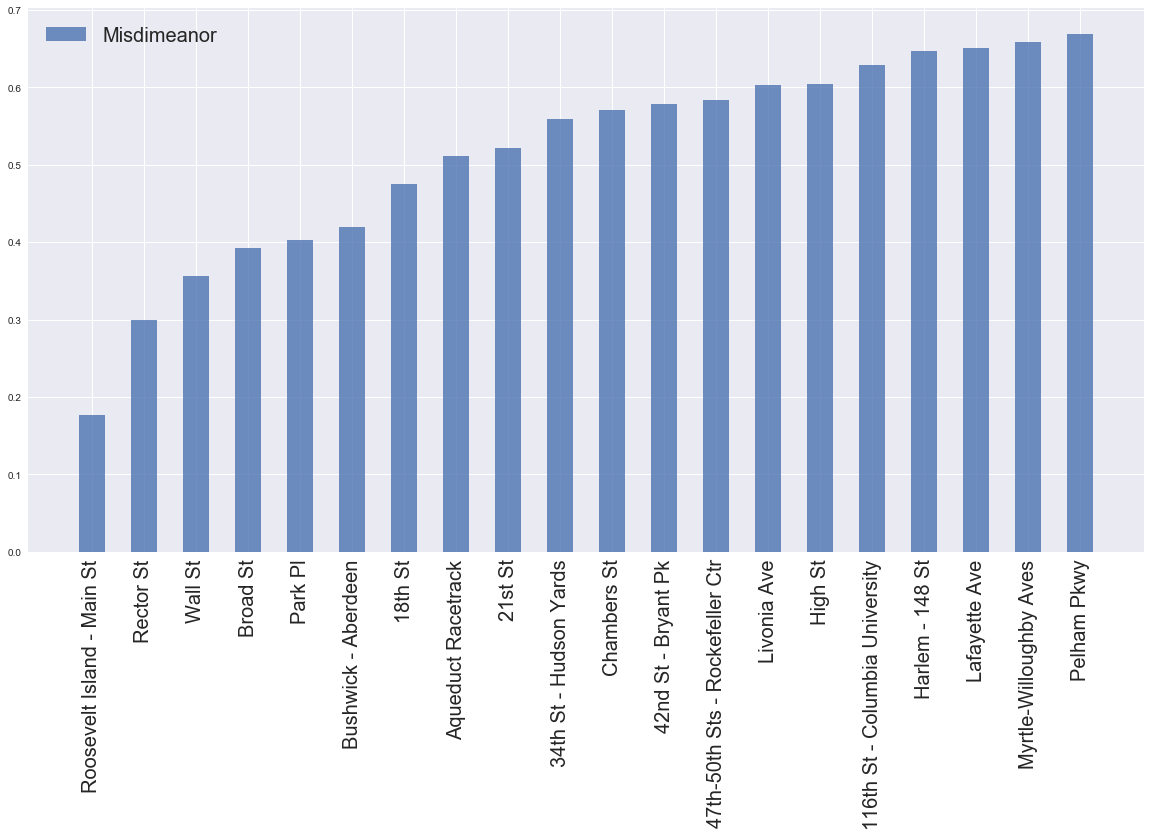

In [267]:
df_sub = df_sub.sort(['M_ratio'],ascending=1)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['M_ratio'].astype(np.float), bar_width,align='center', alpha=0.8, label='Misdimeanor')
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


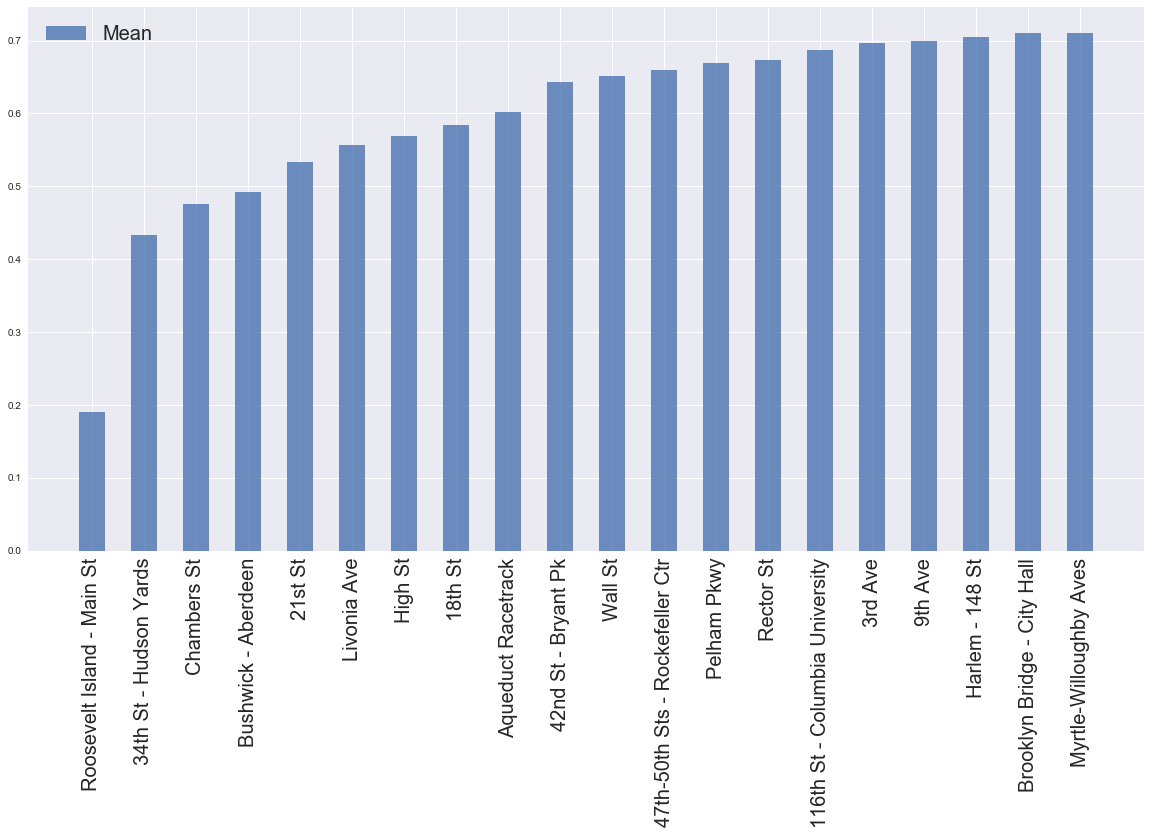

In [325]:
df_sub = df_sub.sort(['Mean_R'],ascending=1)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['Mean_R'].astype(np.float), bar_width,align='center', alpha=0.8, label="Mean")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

In [328]:
df_plot.index

Index(['Roosevelt Island - Main St', '34th St - Hudson Yards', 'Chambers St',
       'Bushwick - Aberdeen', '21st St', 'Livonia Ave', 'High St', '18th St',
       'Aqueduct Racetrack', '42nd St - Bryant Pk', 'Wall St',
       '47th-50th Sts - Rockefeller Ctr', 'Pelham Pkwy', 'Rector St',
       '116th St - Columbia University', '3rd Ave', '9th Ave',
       'Harlem - 148 St', 'Brooklyn Bridge - City Hall',
       'Myrtle-Willoughby Aves'],
      dtype='object')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


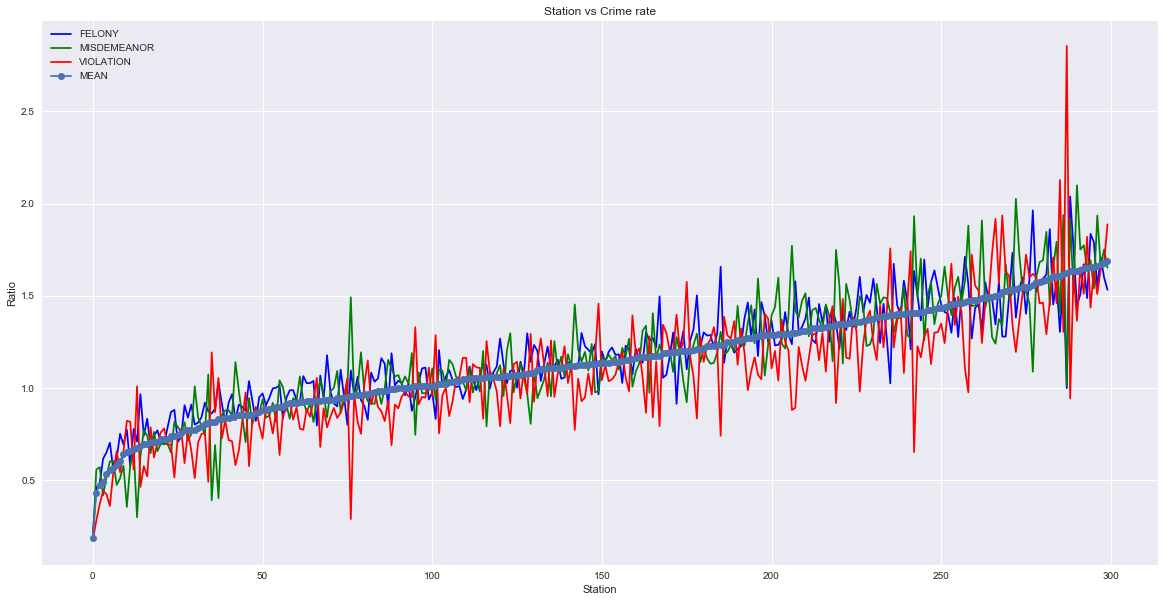

In [248]:
plt.figure(figsize=(20,10))
df_sub = df_sub.sort(['Mean_R'],ascending=1)
df_plot = df_sub.head(300)
y_pos = np.arange(df_plot.shape[0])
plt.plot(y_pos, df_plot['F_ratio'], 'b-',label="FELONY")
plt.plot(y_pos, df_plot['M_ratio'], 'g-',label="MISDEMEANOR")
plt.plot(y_pos, df_plot['V_ratio'], 'r-',label="VIOLATION")
plt.plot(y_pos, df_plot['Mean_R'], 'o-',label="MEAN")
plt.legend()
plt.xlabel("Station")
plt.ylabel("Ratio")
plt.title("Station vs Crime rate")
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


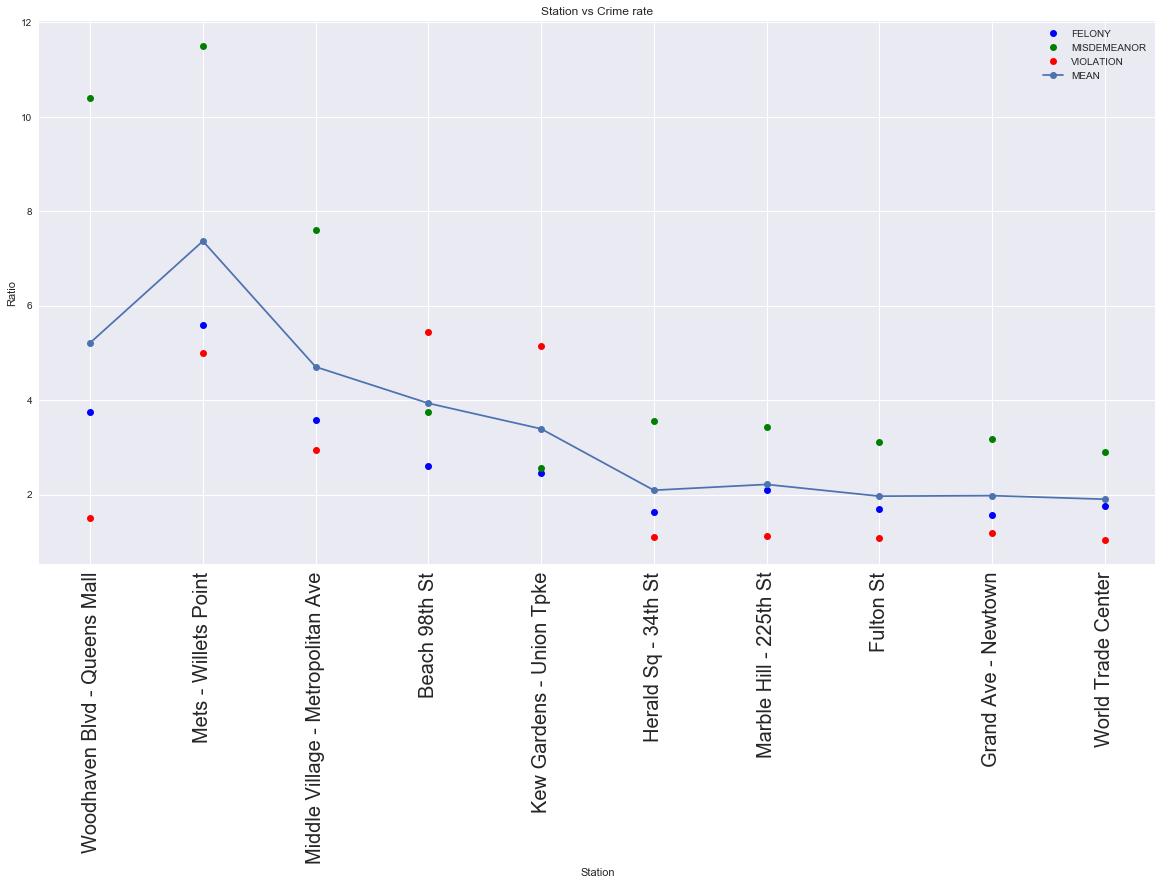

In [321]:
plt.figure(figsize=(20,10))
df_plot = df_sub
df_plot['abs_flag'] = abs(df_plot[['M_ratio','F_ratio','V_ratio']].max(1)-df_plot[['M_ratio','F_ratio','V_ratio']].min(1))
df_plot = df_plot.sort(['abs_flag'],ascending=0)
df_plot = df_plot.head(10)
y_pos = np.arange(df_plot.shape[0])
plt.plot(y_pos, df_plot['F_ratio'], 'bo',label="FELONY")
plt.plot(y_pos, df_plot['M_ratio'], 'go',label="MISDEMEANOR")
plt.plot(y_pos, df_plot['V_ratio'], 'ro',label="VIOLATION")
plt.plot(y_pos, df_plot['Mean_R'], 'o-',label="MEAN")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend()
plt.xlabel("Station")
plt.ylabel("Ratio")
plt.title("Station vs Crime rate")
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


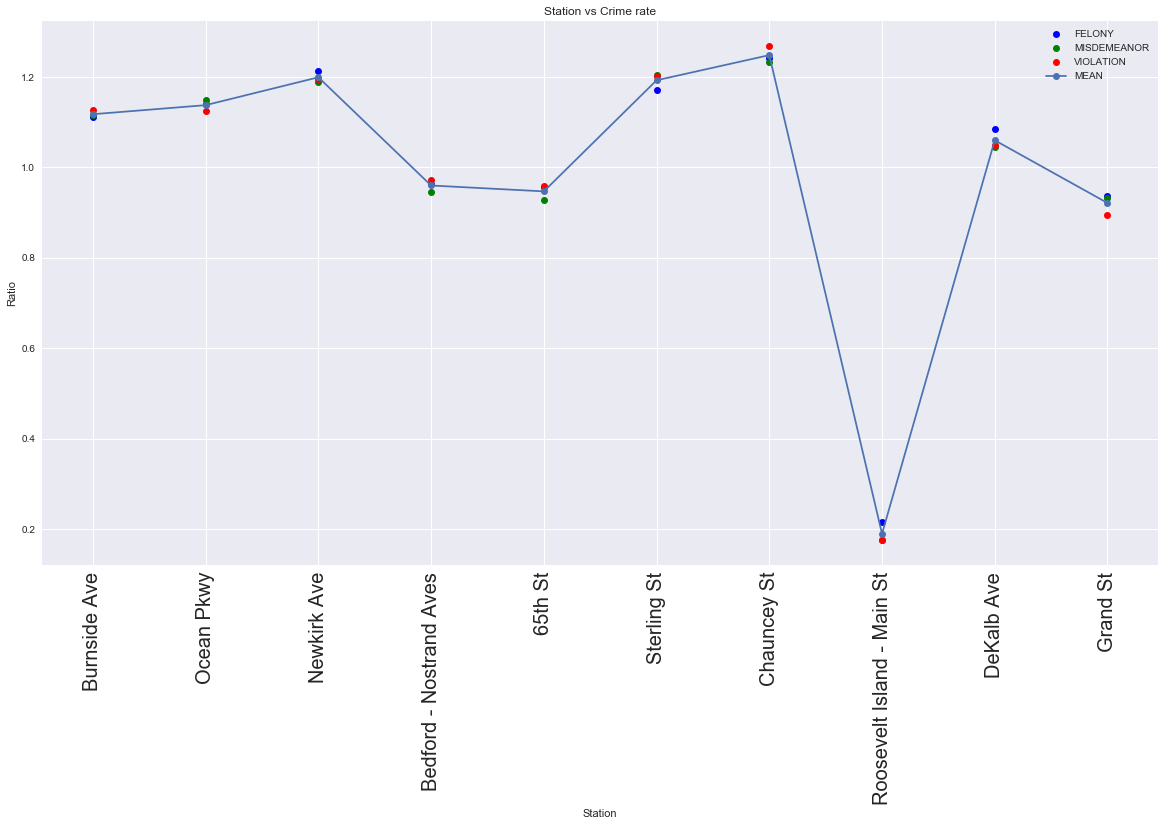

In [322]:
plt.figure(figsize=(20,10))
df_plot = df_sub
df_plot['abs_flag'] = abs(df_plot[['M_ratio','F_ratio','V_ratio']].max(1)-df_plot[['M_ratio','F_ratio','V_ratio']].min(1))
df_plot = df_plot.sort(['abs_flag'],ascending=1)
df_plot = df_plot.head(10)
y_pos = np.arange(df_plot.shape[0])
plt.plot(y_pos, df_plot['F_ratio'], 'bo',label="FELONY")
plt.plot(y_pos, df_plot['M_ratio'], 'go',label="MISDEMEANOR")
plt.plot(y_pos, df_plot['V_ratio'], 'ro',label="VIOLATION")
plt.plot(y_pos, df_plot['Mean_R'], 'o-',label="MEAN")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend()
plt.xlabel("Station")
plt.ylabel("Ratio")
plt.title("Station vs Crime rate")
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


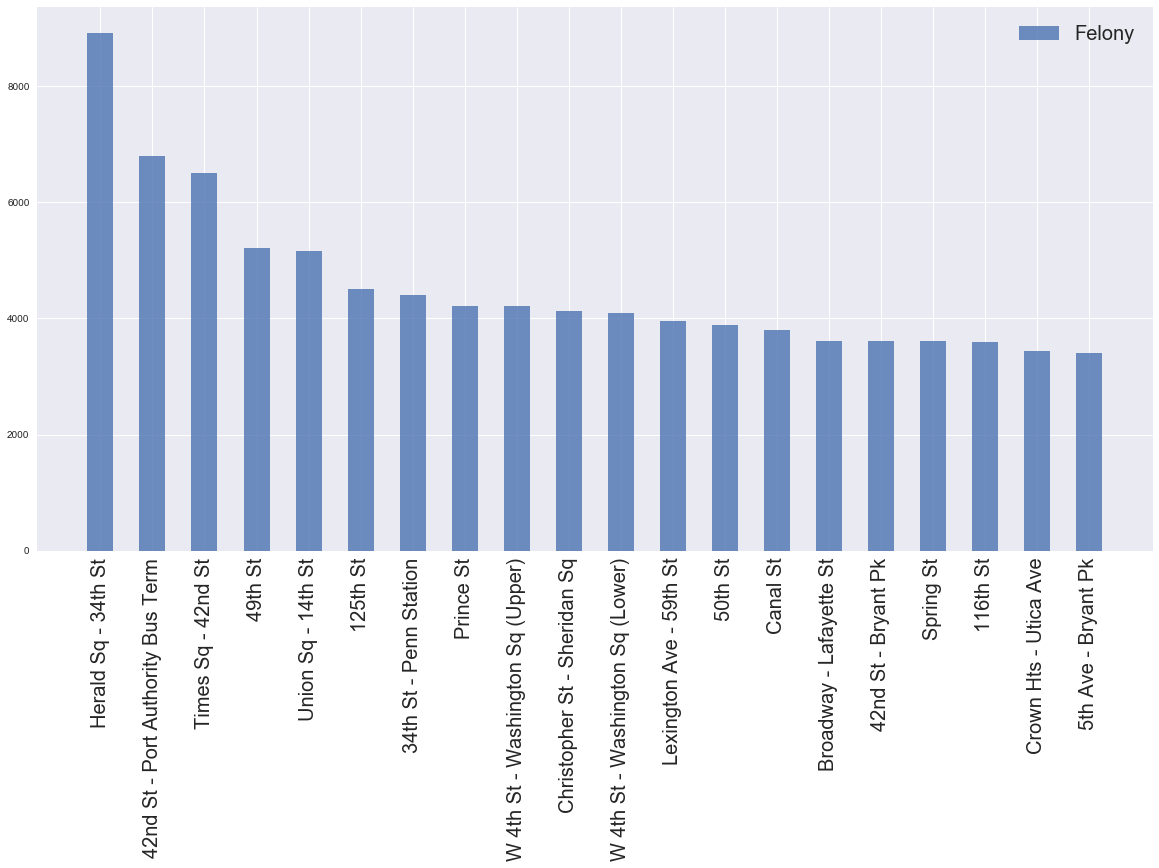

In [272]:
df_sub = df_sub.sort(['F_near'],ascending=0)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['F_near'].astype(np.float), bar_width,align='center', alpha=0.8,label="Felony")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


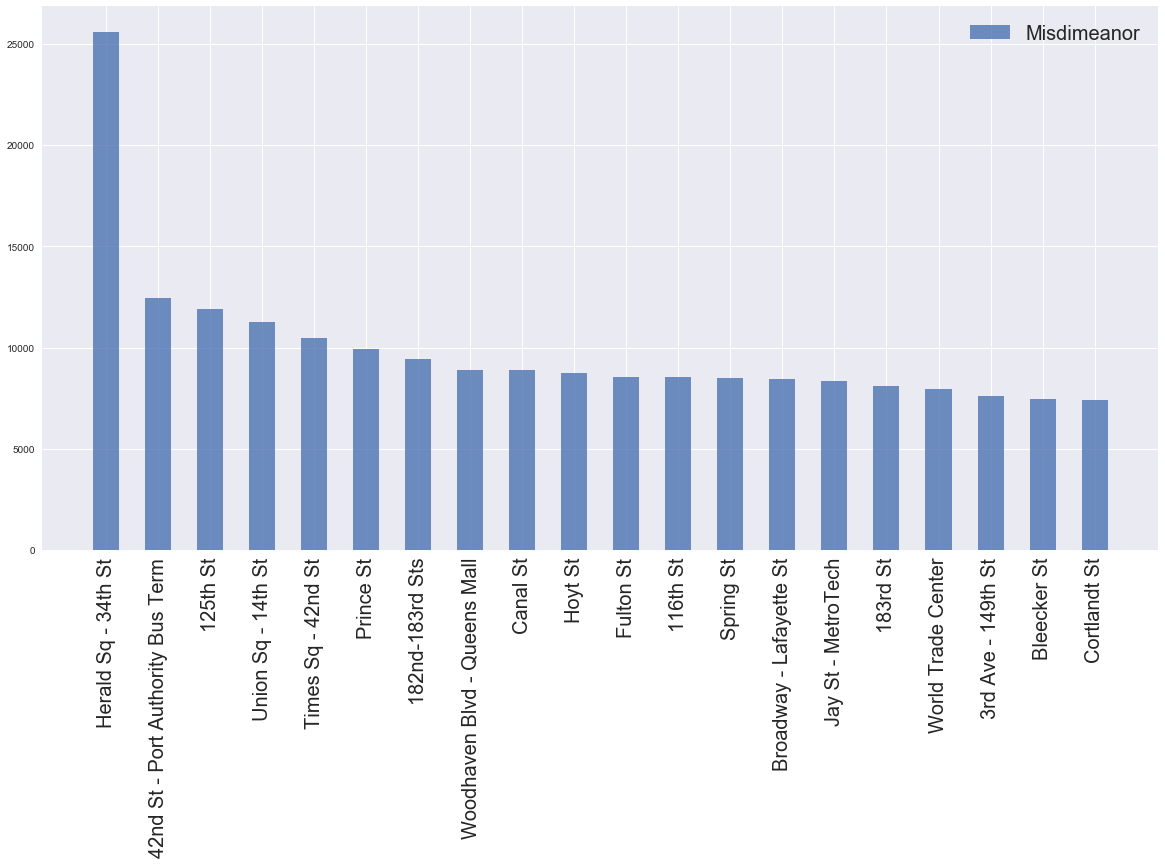

In [279]:
df_sub = df_sub.sort(['M_near'],ascending=0)
df_plot = df_sub.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['M_near'].astype(np.float), bar_width,align='center', alpha=0.8,label="Misdimeanor")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


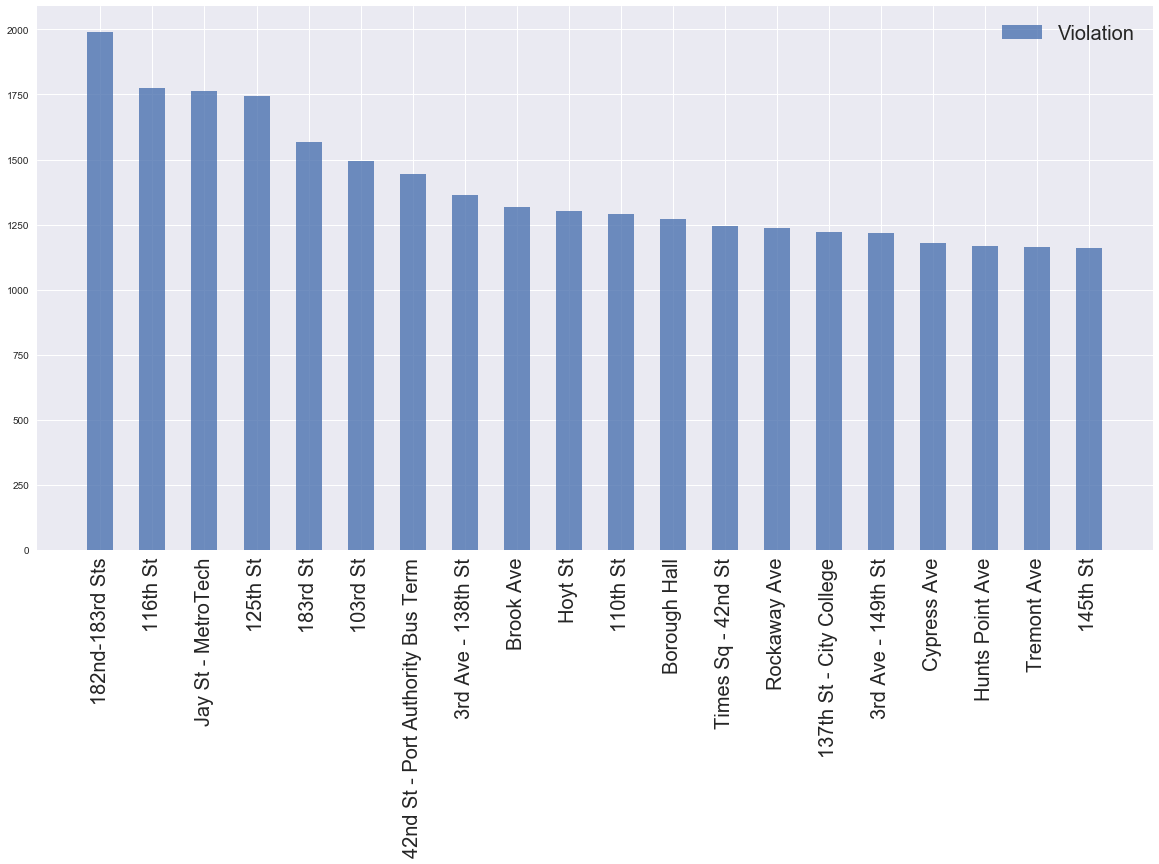

In [280]:
df_sub = df_sub.sort(['V_near'],ascending=0)
df_plot = df_sub.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['V_near'].astype(np.float), bar_width,align='center', alpha=0.8,label="Violation")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


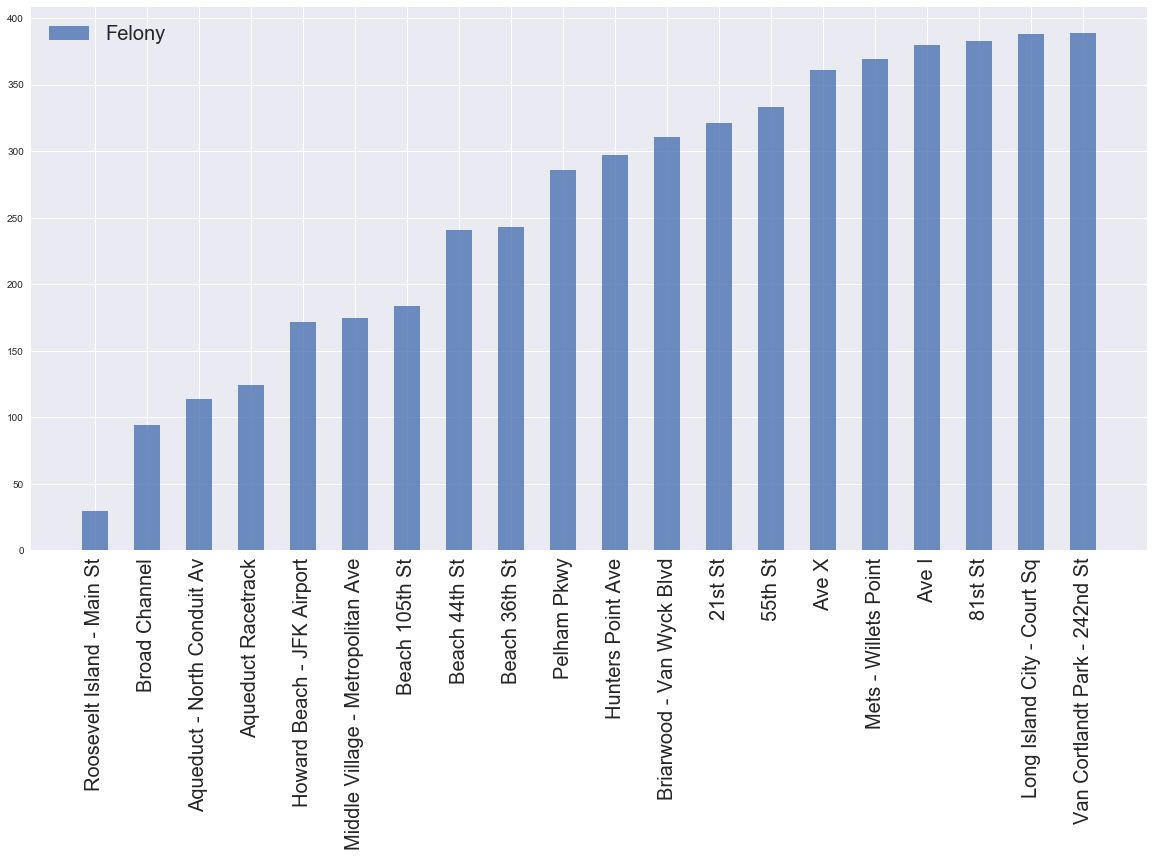

In [276]:
df_sub = df_sub.sort(['F_near'],ascending=1)
df_plot = df_sub.head(20)
y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['F_near'].astype(np.float), bar_width,align='center', alpha=0.8,label="Felony")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


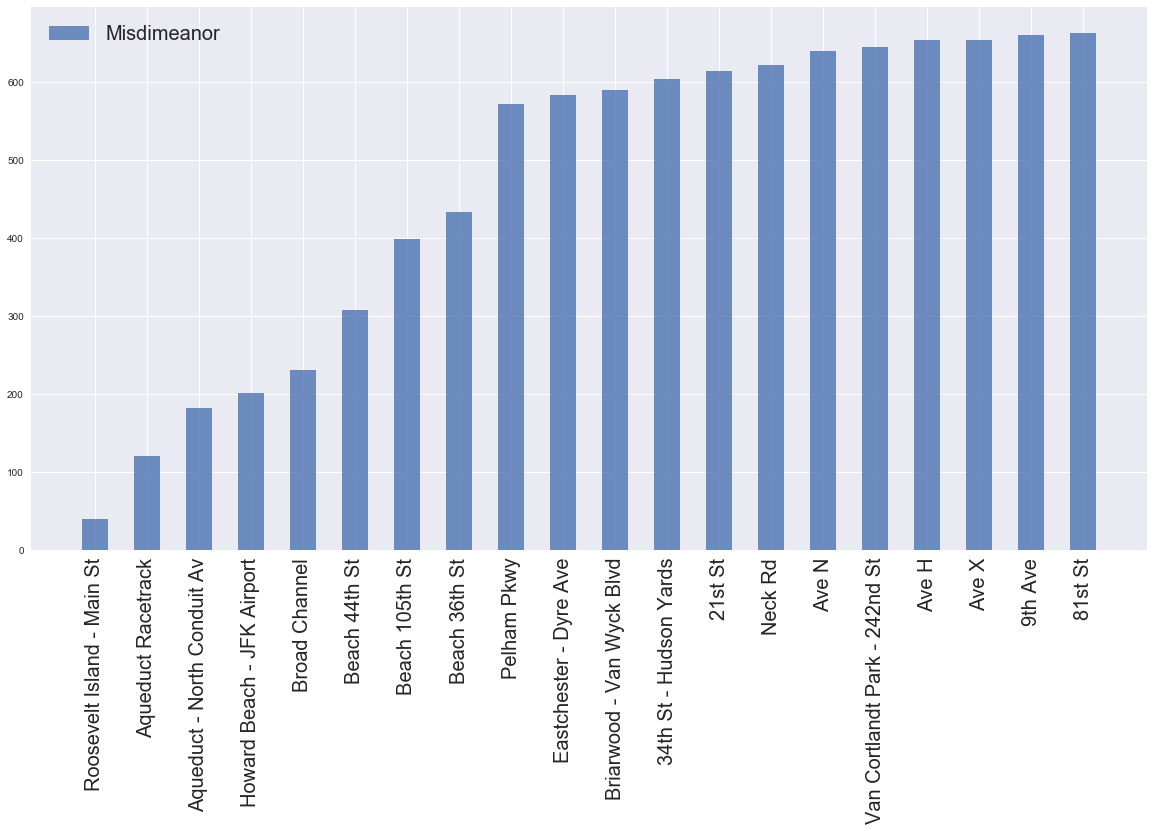

In [282]:
df_sub = df_sub.sort(['M_near'],ascending=1)
df_plot = df_sub.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['M_near'].astype(np.float), bar_width,align='center', alpha=0.8,label="Misdimeanor")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


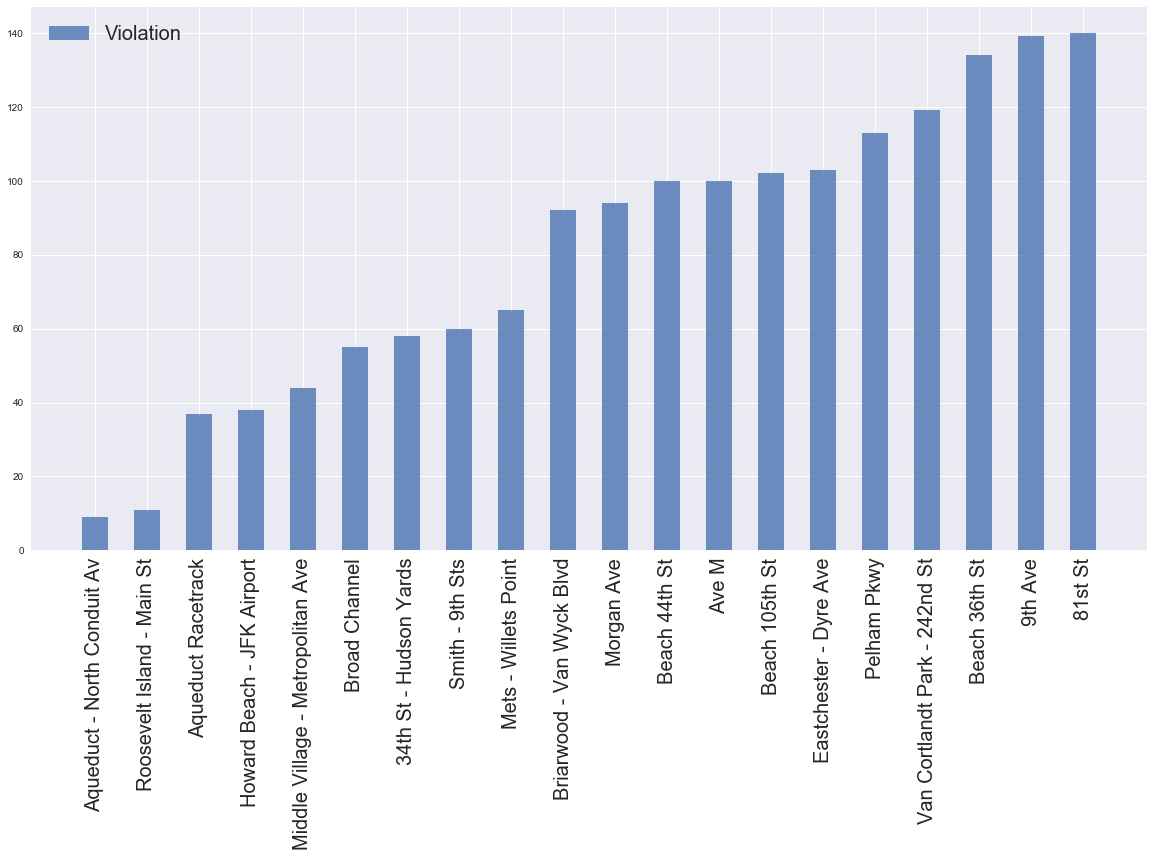

In [284]:
df_sub = df_sub.sort(['V_near'],ascending=1)
df_plot = df_sub.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['V_near'].astype(np.float), bar_width,align='center', alpha=0.8,label="Violation")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


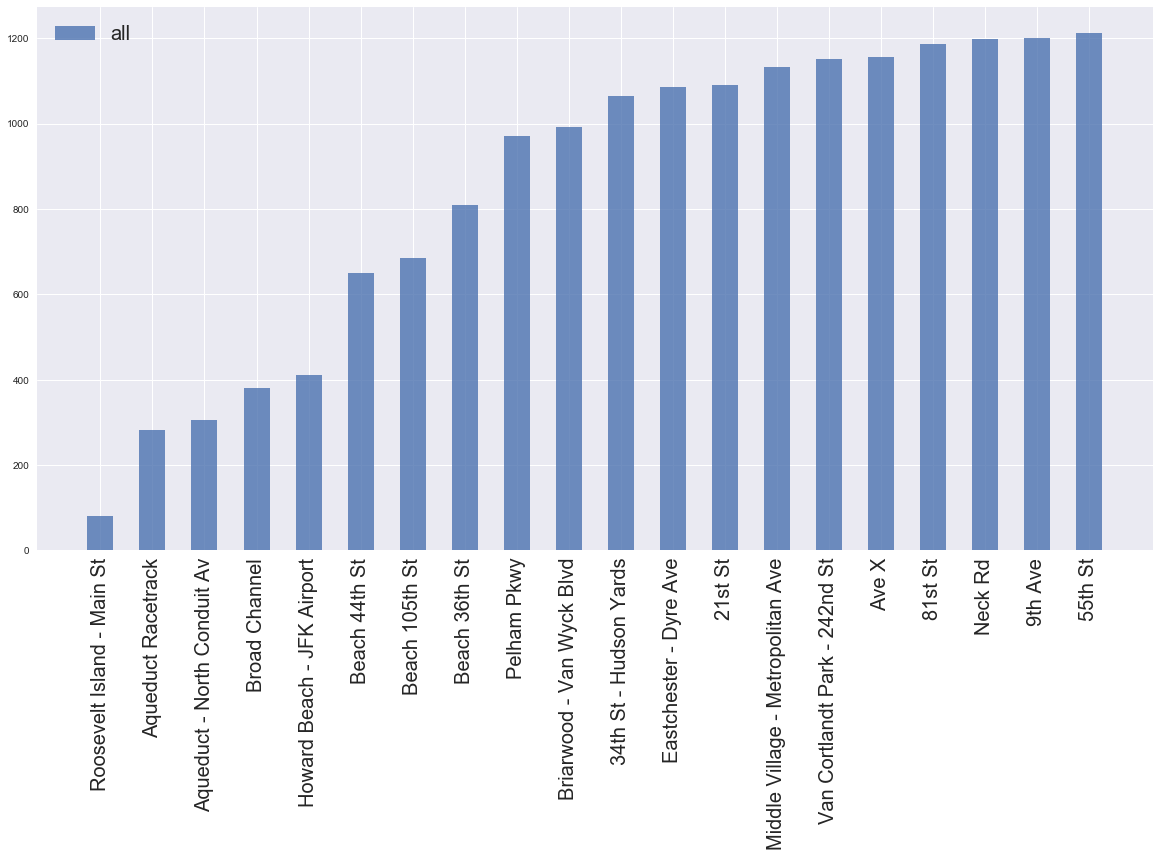

In [286]:
df_plot = df_sub
df_plot['All'] = df_plot['F_near'] + df_plot['M_near'] + df_plot['V_near']
df_plot = df_plot.sort(['All'],ascending=1)
df_plot = df_plot.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['All'].astype(np.float), bar_width,align='center', alpha=0.8,label="all")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=2,prop={'size':20})
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


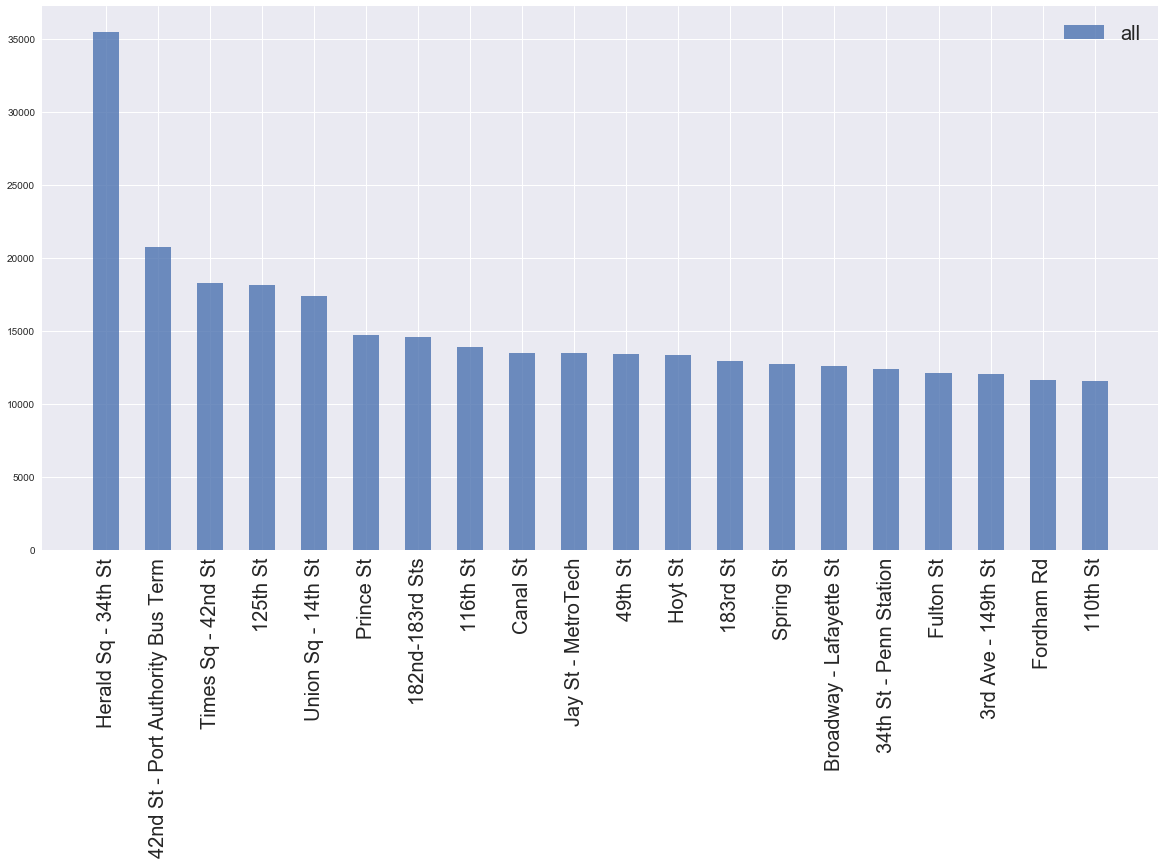

In [287]:
df_plot = df_sub
df_plot['All'] = df_plot['F_near'] + df_plot['M_near'] + df_plot['V_near']
df_plot = df_plot.sort(['All'],ascending=0)
df_plot = df_plot.head(20)

y_pos = np.arange(df_plot.shape[0])
plt.figure(figsize=(20,10))
bar_width =0.5
plt.bar(y_pos, df_plot['All'].astype(np.float), bar_width,align='center', alpha=0.8,label="all")
plt.xticks(y_pos, df_plot.index,fontsize = 20,rotation=90)
plt.legend(loc=1,prop={'size':20})
plt.show()

In [211]:
df_sub[['F_ratio','V_ratio','M_ratio','Mean_R']].corr()

,F_ratio,V_ratio,M_ratio,Mean_R
F_ratio,1.000000,0.733018,0.856514,0.947248
V_ratio,0.733018,1.000000,0.580575,0.815483
M_ratio,0.856514,0.580575,1.000000,0.935237
Mean_R,0.947248,0.815483,0.935237,1.000000


In [324]:
df_sub[['F_near','V_near','M_near','All']].corr()

,F_near,V_near,M_near,All
F_near,1.000000,0.729922,0.910008,0.955431
V_near,0.729922,1.000000,0.743912,0.790630
M_near,0.910008,0.743912,1.000000,0.989516
All,0.955431,0.790630,0.989516,1.000000


In [290]:
df_sub[['F_near','F_far','F_ratio']].corr()

,F_near,F_far,F_ratio
F_near,1.000000,0.885939,0.027932
F_far,0.885939,1.000000,-0.275432
F_ratio,0.027932,-0.275432,1.000000


In [291]:
df_sub[['M_near','M_far','M_ratio']].corr()

,M_near,M_far,M_ratio
M_near,1.000000,0.729942,0.213075
M_far,0.729942,1.000000,-0.197925
M_ratio,0.213075,-0.197925,1.000000


In [292]:
df_sub[['V_near','V_far','V_ratio']].corr()

,V_near,V_far,V_ratio
V_near,1.000000,0.822184,0.129091
V_far,0.822184,1.000000,-0.275554
V_ratio,0.129091,-0.275554,1.000000
